In [1]:
import IPython

IPython.display.IFrame("http://pandas.pydata.org", width=950, height=900)


# Pandas

The Pandas library is a python module/library that provides data structures and data analysis tools.

Pandas is used to load and analyze data from different sources and output results via tables or through visualization tools like bokeh. It can also provide database like functions including inner, outer, and cross joins.

Pandas is a productive tool for data wrangling, munging, transforming and modeling. 

From the Pandas documentation...
>Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

Pandas is built on NumPy, and for many purposes, provides a more productive environment for managing and analyzing tubular data than numpy. Numpy is a highly efficient and fully featured library that handles vector data - and is quite useful when conducting analysis involving concepts from linear algrabra (https://www.bogotobogo.com/python/python_numpy_matrix_tutorial.php) and other mathematical analysis.

Pandas is a part of the PyData project. The PyData Development Team is a collection of developers focused on the improvement of Python’s data libraries. The core team that coordinates development can be found on Github. 

https://github.com/pydata

The official documentation can be found here...

https://pandas.pydata.org/pandas-docs/stable/index.html



## The Three Pandas Data Types

There are three main datatypes in Pandas, Series, DataFrame and Panel ( Panel is rarely used, so we'll focus on the first two).

* A series is a one dimensional (homogeneously-typed) array.
* A DataFrame is a two dimensional structure of heterogeneously-types columns.  
* A Panel is a three dimensional data structure of DataFrames.

Series and Dataframe structures are more commonly used than Panel data. Considering this, for this course, will focus on these common structdures. 


## Pandas Series

The Series pandas datatype is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 

Each elements of the series can be access through specifying an index.

The general pattern to initializing and naming a Series is :

```
s = pd.Series(data, index=index)
```

Where data can be a dictionary, tuple, list or scalar.  

### A few examples of creating and using Pandas Series

We can create a Series from tuples, lists and dictionaries:

In [2]:
import pandas as pd

names = ("First", "Second", "Third")
a = (1,2,3)
b = [4,5,6]
c = {"Seventh":7,'Eigth':8,"Ninth":9}

s0 = pd.Series(a) # index defaults to 0,1,2,...
s1 = pd.Series(a, index=names)
s2 = pd.Series(b, names)  # index= is implied if second argument is present. 
s3 = pd.Series(b, names, dtype='float32')  # Here we can also set datatype
s4 = pd.Series(b, names)
s5 = pd.Series(c) # 


In [3]:
s0

0    1
1    2
2    3
dtype: int64

In [4]:
s1

First     1
Second    2
Third     3
dtype: int64

In [5]:
s2

First     4
Second    5
Third     6
dtype: int64

In [6]:
s3

First     4.0
Second    5.0
Third     6.0
dtype: float32

In [7]:
s4

First     4
Second    5
Third     6
dtype: int64

... as we see above, dictionaries are a little different. Dictionaries already contain names for each element. Note that if we create a data series using a dictionary, we do not need a names argument...

In [8]:
s5 = pd.Series(c) 
s5

Seventh    7
Eigth      8
Ninth      9
dtype: int64

...but, we must also remember that dictionaries, unlike tuples and lists, can't be expected to preserve their order. So, as seen above, when we initialize a Pandas series using a dictionary, we cannot expect an ordered list of indexes.


If we're expected an ordered list, there are many ways of handling this. One way is to extract the dict data into a tuple and hand Series an explicit list of index names:

In [9]:
s3.sort_values()
s3

First     4.0
Second    5.0
Third     6.0
dtype: float32

... now we see the data is nicely ordered.

### Iteration of a Pandas Series 

As you would expect, we can also easily iterate through values in a series

In [10]:
for element in s1:
    print(element)

1
2
3


... and also interate over key value pairs

In [11]:
for key, val in s2.iteritems():
    print(key, val)

First 4
Second 5
Third 6


### A Pandas Series is an Object - and contains many useful methods

To see a list of methods supported by an object, you can use the dir() function. The dir() function will list all the attributes and methods found within a given object (see here (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

### Let's look at one of these methods, plot()


Pandas has a number of visualization methods (functions). To use these you will need to have matplotlib installed. Anaconda, by deafult, should have matplotlib installed. 


But, to install matplotlib ....

```
conda install matplotlib
```


Let's look at the plot function...

In [12]:
s2.plot()

... notice that the above code doesn't display a plot?

By default, Pandas uses a library called "matplotlib" to display graphics within Jupyter, you need to include the jupyter "Magic" tag `%matplotlib` in order to use this within Jupyter...

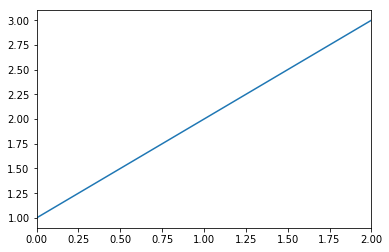

In [13]:
%matplotlib inline
s0.plot()

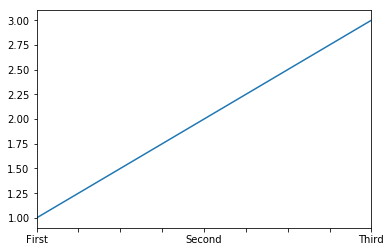

In [14]:
%matplotlib inline
s1.plot()

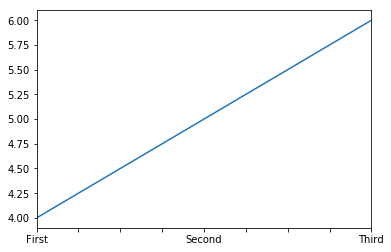

In [15]:
%matplotlib inline
s3.plot()

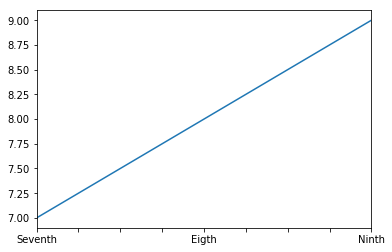

In [16]:
%matplotlib inline
s5.plot()

### Yes, Series is very "dictionary-like"

In [17]:
s1["First"]

1

In [18]:
s1["Second"]

2

In [19]:
s1["Third"]

3

In [20]:
# s1["Fourth"]

... and, as we see if we ran the above code "s1["Fourth"]", Series are subject to "out of bounds" errors is we attempt to access an element with an index that does not exist. 

...we can also try "getting" a value from a Series object, in this case if None is returned, we know the key doesn't exist:

In [21]:
print(s1.get("Fourth"))

None


In [22]:
print(s1.get("Third"))

3


Like when using dictionaries, getting allows you to try a key to see if it exists without throwing an exception.

### Vectorized Operations with Pandas Series

Here's where Pandas Series starts to differentiate itself from Dictionaries. Using Pandas Series, we can use vector operations to create vectorized expressions.

In [23]:
s1 + s1

First     2
Second    4
Third     6
dtype: int64

In [24]:
s1 + 2

First     3
Second    4
Third     5
dtype: int64

In [25]:
s1 * 10

First     10
Second    20
Third     30
dtype: int64

In [26]:
s1*2+s2**3

First      66
Second    129
Third     222
dtype: int64

## Slicing Pandas Series

We can also use the index/slice operator on a Pandas Series...

In [27]:
s1[1:]+s2[1:]

Second    7
Third     9
dtype: int64

In [28]:
s1[-1]+s2[1]

8

# DataFrames
Pandas Series objects are a powerful means through which to organize and analyze our data, but we often look to analyze two-dimensional data as well. 

Pandas DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

<sub>(source: http://pandas.pydata.org/pandas-docs/stable/dsintro.html)</sub>

You can think of DataFrames as a collection of columns of series data:

In [29]:
s1

First     1
Second    2
Third     3
dtype: int64

In [30]:
s2

First     4
Second    5
Third     6
dtype: int64

In [47]:
df = pd.DataFrame([s1, s2]) # note that each item in the list is a row
df

,First,Second,Third
0,1,2,3
1,4,5,6


There are many ways you can create DataFrame, for instance, from a dictionary of lists:

In [49]:
df = pd.DataFrame({'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]})
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


# Indexes and columns

Each column of a dataframe has a given name, while each row has a numbered index that is automatically generated by the DataFrame object:

In [51]:
df

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [34]:
df.index

RangeIndex(start=0, stop=4, step=1)

You can also set the index to whatever you'd like (but, I'd consider this advanced, and for the most part, not necessary for anything we will do in this course)

In [52]:
df.set_index('one')

,two
one,
1.0,4.0
2.0,3.0
3.0,2.0
4.0,1.0


Let's reset the index back to it's default

In [53]:
df.reindex()

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


We can easily add colums to a DataFrame (PS: This is very useful!):

In [35]:
df['three']=df['one']*df['two']
df

,one,two,three
0,1.0,4.0,4.0
1,2.0,3.0,6.0
2,3.0,2.0,6.0
3,4.0,1.0,4.0


In [36]:
df['four']=[10,11,12,13]
df

,one,two,three,four
0,1.0,4.0,4.0,10
1,2.0,3.0,6.0,11
2,3.0,2.0,6.0,12
3,4.0,1.0,4.0,13


Or, if we wish, delete any row within a DataFrame:

In [37]:
del df['one']
df

,two,three,four
0,4.0,4.0,10
1,3.0,6.0,11
2,2.0,6.0,12
3,1.0,4.0,13


NOTE: Delete simply deletes the column, while pop deletes the column and returns the colums (as a series)

In [38]:
ret_s = df.pop('three')
ret_s

0    4.0
1    6.0
2    6.0
3    4.0
Name: three, dtype: float64

In [39]:
df

,two,four
0,4.0,10
1,3.0,11
2,2.0,12
3,1.0,13


And, as we might expect -- there are number of operations we can use to manipulate columns:

In [40]:
df2 = pd.DataFrame() # create a blank data frame
df2['two']=df['two']*df['two'].mean() # add a column two, and use values from df to create the values in this column
df2['two_mean']=df['two'].mean()
df2['four']=df['four']
df2

,two,two_mean,four
0,10.0,2.5,10
1,7.5,2.5,11
2,5.0,2.5,12
3,2.5,2.5,13


In [41]:
df3 = pd.DataFrame()
for column in df:
    df3[column]=df[column]
    df3[column+"_mean"]=df[column].mean()
df3

,two,two_mean,four,four_mean
0,4.0,2.5,10,11.5
1,3.0,2.5,11,11.5
2,2.0,2.5,12,11.5
3,1.0,2.5,13,11.5


Pandas is a very user library that has many features. We've covered the essential basic features here, but for a more complete understanding of Pandas, I'd recommend Python for [Data Analysis](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662/ref=asc_df_1491957662/?tag=hyprod-20&linkCode=df0&hvadid=312140868236&hvpos=1o1&hvnetw=g&hvrand=11715487081875566727&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9012131&hvtargid=pla-396828636441&psc=1) by Wes McKinney (the creator of Pandas)